# Package Installing

In [ ]:
%%capture
!pip install umap-learn bertopic

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud

from bertopic import BERTopic
from umap import UMAP

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
sns.set_style("darkgrid")

# Mounting From Google Colab

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [ ]:
cd /content/mydrive/MyDrive/Colab Notebooks/Projects/Netflix Movies and TV Shows Analysis

/content/mydrive/MyDrive/Colab Notebooks/Projects/Netflix Movies and TV Shows Analysis


# Data Overview

In [ ]:
main_data = pd.read_csv('netflix_titles.csv')

In [ ]:
main_data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
main_data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
main_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
main_data.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [ ]:
main_data.describe(include='object')

show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   

                      cast        country       date_added rating  duration  \
count                 7982           7976             8797   8803      8804   
unique                7692            748             1767     17       220   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    19           2818              109   3207      1793   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4

# Data Preprocessing

In [ ]:
main_data.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
main_data.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
main_data[main_data.rating.isna()]

show_id     type                                              title  \
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   
7537   s7538    Movie                               My Honor Was Loyalty   

             director                                               cast  \
5989              NaN                        Oprah Winfrey, Ava DuVernay   
6827              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
7312              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
7537  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

        country        date_added  release_year rating  duration  \
5989        NaN  January 26, 2017          2017    NaN    37 min   
6827      Japan  December 1, 2016          2013    NaN  1 Season   
7312  Australia  February 1, 2018          2015    NaN  1 Season   
7537      Italy     March 1, 2017          2015    NaN   115 min   

                                 listed_in  \
5989                                Movies   
6827  Anime Series, International TV Shows   
7312                 Kids' TV, TV Comedies   
7537                                Dramas   

                                            description  
5989  Oprah Winfrey sits down with director Ava DuVe...  
6827  After falling through a wormhole, a space-dwel...  
7312  Adopting a child's perspective, this show take...  
7537  Amid the chaos and horror of World War II, a c...

In [ ]:
main_data.loc[main_data.rating.isin(['74 min', '84 min', '66 min']), 'duration'] = ['74 min', '84 min', '66 min']
main_data.loc[main_data.rating.isin(['74 min', '84 min', '66 min']), 'rating'] = np.nan

In [ ]:
main_data.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [ ]:
not_season = main_data.loc[~ main_data.duration.str.contains('Season')]

<Axes: >

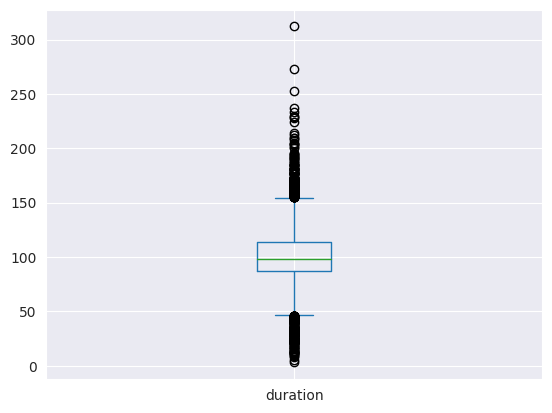

In [ ]:
not_season.duration.apply(lambda x : int(x.split()[0])).plot.box()

In [ ]:
not_season.duration.apply(lambda x : int(x.split()[0])).sort_values()

3777      3
2713      5
1484      8
1557      9
3535     10
       ... 
2484    233
2487    237
2491    253
717     273
4253    312
Name: duration, Length: 6131, dtype: int64

In [ ]:
main_data.iloc[[3777]]

show_id   type   title                           director cast  \
3777   s3778  Movie  Silent  Limbert Fabian, Brandon Oldenburg  NaN   

            country    date_added  release_year rating duration  \
3777  United States  June 4, 2019          2014   TV-Y    3 min   

                                       listed_in  \
3777  Children & Family Movies, Sci-Fi & Fantasy   

                                            description  
3777  "Silent" is an animated short film created by ...

In [ ]:
main_data.loc[~ main_data.index.isin(not_season.index)].type.value_counts()

TV Show    2676
Name: type, dtype: int64

In [ ]:
not_season.type.value_counts()

Movie    6131
Name: type, dtype: int64

# Tasks ( Questioning )

In [ ]:
def set_freq(ax):

  """ Set frequency label on top of the bars in barplot """

  for cont in ax.containers :
    ax.bar_label(cont)

## Understanding what content is available in different countries

In [ ]:
main_data.sample(3)

show_id     type                          title     director  \
7767   s7768  TV Show      Power Rangers Lost Galaxy          NaN   
1738   s1739    Movie              A Christmas Catch          NaN   
5379   s5380    Movie  Tom Segura: Completely Normal  Jay Chapman   

                                                   cast  \
7767  Archie Kao, Reggie Rolle, Danny Slavin, Valeri...   
1738  Emily Alatalo, Lauren Holly, Yanic Truesdale, ...   
5379                                         Tom Segura   

                           country        date_added  release_year rating  \
7767  United States, France, Japan   January 1, 2016          1999  TV-Y7   
1738                        Canada  November 4, 2020          2018   TV-G   
5379                 United States     July 13, 2017          2014  TV-MA   

      duration                listed_in  \
7767  1 Season                 Kids' TV   
1738    87 min  Dramas, Romantic Movies   
5379    74 min          Stand-Up Comedy   

                                            description  
7767  Five teenagers, transformed by the mystical po...  
1738  A cop working undercover to trail a possible d...  
5379  Levelheaded stand-up Tom Segura shares offhand...

In [ ]:
country_data = main_data.fillna({'country' : 'Other'}).copy()

In [ ]:
country_dict = pd.Series(Counter(list(map(str.strip, ','.join(country_data.country).split(',')))))

In [ ]:
country_dict

United States    3690
South Africa       62
Other             831
India            1046
Ghana               5
                 ... 
Sudan               1
Panama              1
Uganda              1
East Germany        1
Montenegro          1
Length: 124, dtype: int64

In [ ]:
print(f"number of countries provided : {len(country_dict)}")

number of countries provided : 124


In [ ]:
country_dict.sort_values(ascending=False)[:10]

United States     3690
India             1046
Other              831
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
dtype: int64

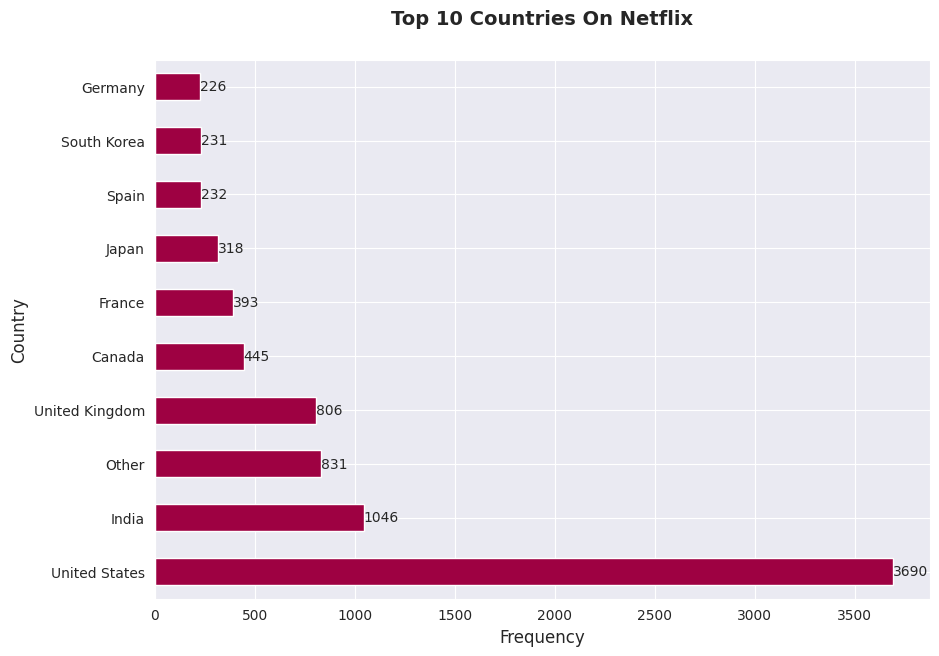

In [ ]:
ax = country_dict.sort_values(ascending=False)[:10].plot.barh(figsize = (10,7), cmap = 'Spectral')
set_freq(ax)
plt.ylabel('Country', size = 12)
plt.xlabel('Frequency', size = 12)
plt.title('Top 10 Countries On Netflix', size = 14, y = 1.05, fontweight = 'bold')
plt.show()

In [ ]:
main_data.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
show_content_country = lambda c : country_data[country_data.country.str.contains(c)].rating.value_counts().plot.bar(  cmap = 'Spectral')

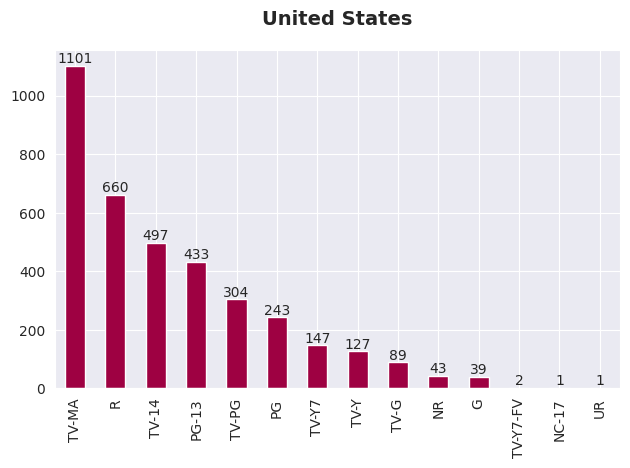

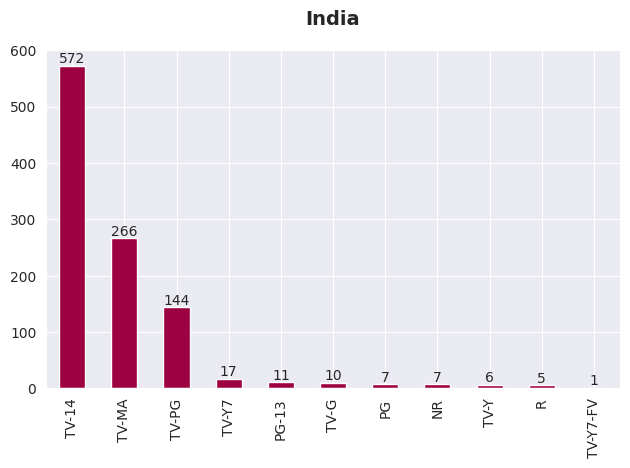

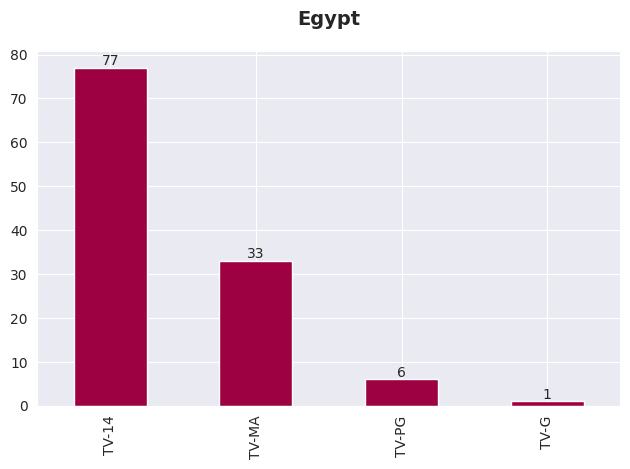

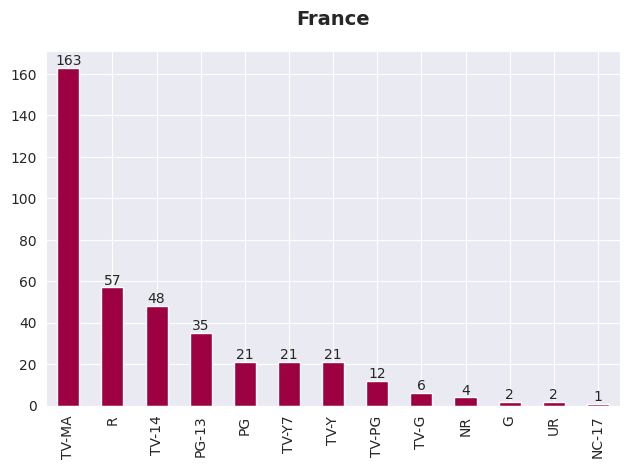

In [ ]:
for c in ['United States', 'India', 'Egypt', 'France'] :
  ax = show_content_country(c)
  set_freq(ax)
  plt.title(c, size = 14, fontweight = 'bold', y = 1.05)
  plt.tight_layout()
  plt.show()

The most frequent content is for MA ( Mature Audiences )

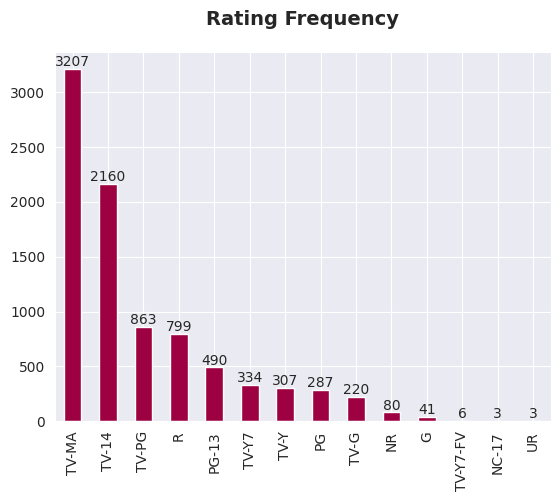

In [ ]:
ax = main_data.rating.value_counts().plot.bar(cmap = 'Spectral')
set_freq(ax)
plt.title('Rating Frequency', fontweight = 'bold', size = 14, y = 1.05)
plt.show()

## Identify the similar content by using the rating feature

In [ ]:
main_data.sample(5)

show_id     type                      title                    director  \
8651   s8652    Movie                      Tyson                James Toback   
3569   s3570    Movie  Game Over (Tamil Version)            Ashwin Saravanan   
5307   s5308    Movie                  Resurface  Josh Izenberg, Wynn Padula   
7023   s7024    Movie     Humko Deewana Kar Gaye                  Raj Kanwar   
2739   s2740  TV Show         Pokémon the Series                         NaN   

                                                   cast  \
8651                         Mike Tyson, Trevor Berbick   
3569  Taapsee Pannu, Vinodhini, Parvathi T, Ramya Su...   
5307                                                NaN   
7023  Akshay Kumar, Katrina Kaif, Bipasha Basu, Bhag...   
2739  Sarah Natochenny, Laurie Hymes, Jessica Paquet...   

                    country         date_added  release_year rating  \
8651  United States, France      March 1, 2019          2008      R   
3569          India, Turkey    August 21, 2019          2019  TV-MA   
5307          United States  September 1, 2017          2017  TV-MA   
7023                  India   October 22, 2017          2006  TV-PG   
2739                    NaN      April 1, 2020          2019  TV-Y7   

       duration                                          listed_in  \
8651     90 min                       Documentaries, Sports Movies   
3569     98 min     Horror Movies, International Movies, Thrillers   
5307     28 min                       Documentaries, Sports Movies   
7023    149 min  International Movies, Music & Musicals, Romant...   
2739  3 Seasons                             Anime Series, Kids' TV   

                                            description  
8651  In this surprisingly emotional documentary, he...  
3569  As a series of murders hit close to home, a vi...  
5307  A suicidal war veteran finds like-minded souls...  
7023  Two kindred spirits who are betrothed to other...  
2739  Ash and his Pikachu travel to the Alola region...

In [ ]:
main_data.iloc[4986, -2]

'Dramas, International Movies'

In [ ]:
print(rating_unique_values := main_data.rating.dropna().unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


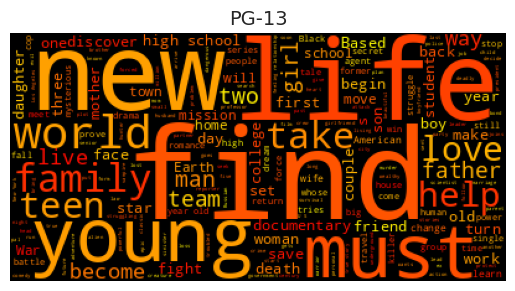

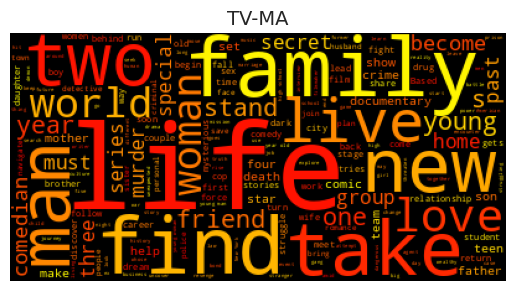

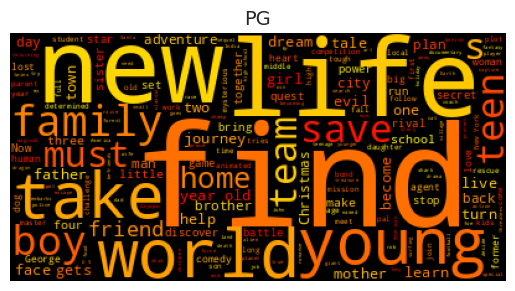

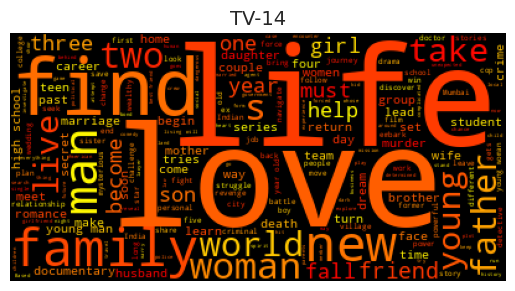

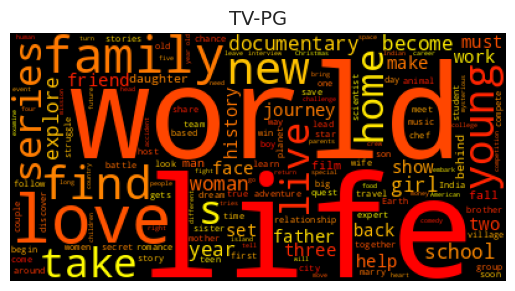

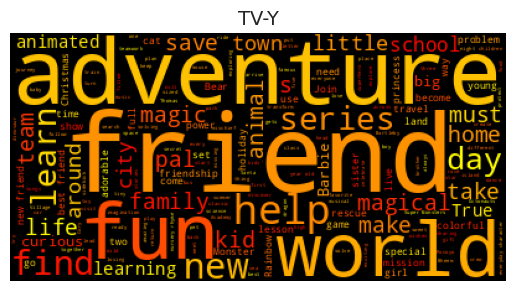

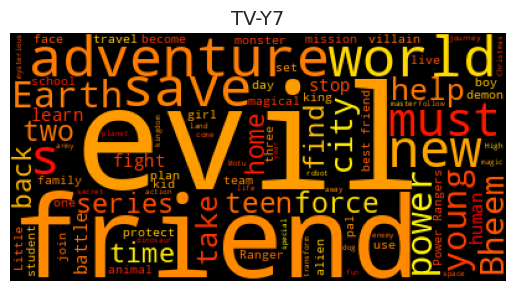

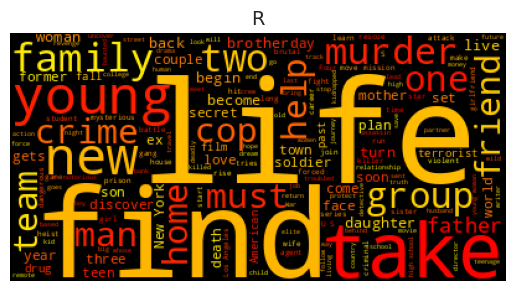

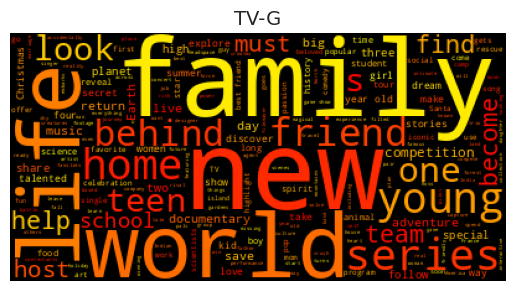

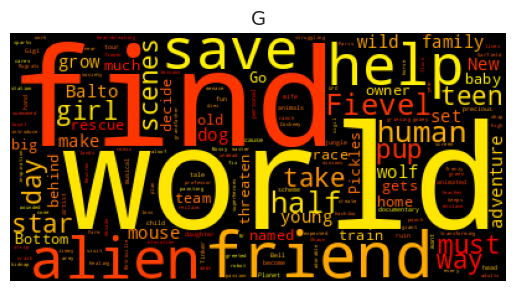

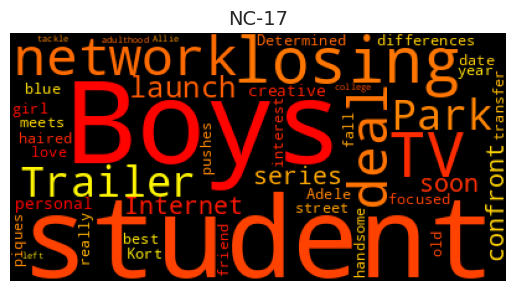

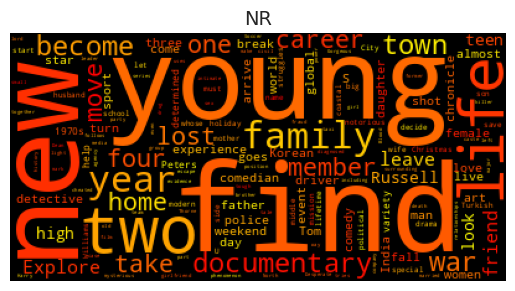

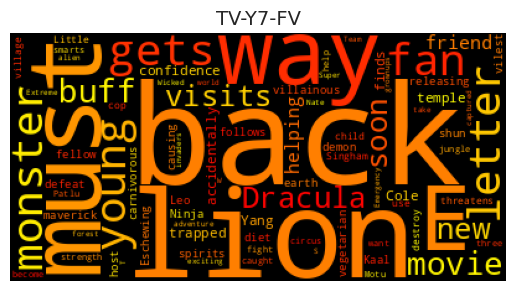

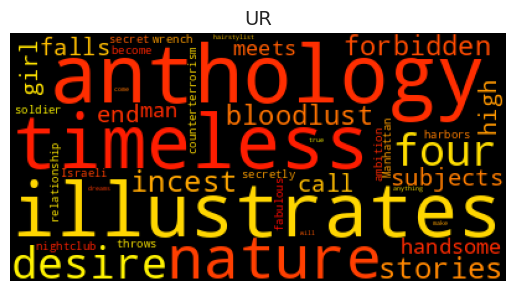

In [ ]:
for v in rating_unique_values :
  word_cloud =  WordCloud(colormap='autumn').generate(' '.join(main_data[main_data.rating == v]['description']))
  plt.imshow(word_cloud)
  plt.title(v, size = 14)
  plt.axis('off')
  plt.show()

In [ ]:
stop_words = stopwords.words('english') + ['one', 'two', 'three','four', 'five', 'six', 'seven']

In [ ]:
def Text_Preprocessing(text) :

  # Remove punctuation
  text = re.sub(r'[^\w\d\s]', ' ', text)
  # Replace whitespace between terms with a single space
  text = re.sub(r'\s+', ' ', text)
  # Remove leading and trailing whitespace
  text = re.sub(r'^\s+|\s+?$', '', text)
  # converting to lower case
  text = text.lower()
  # Replace numbers like price values with 'numbr'
  text = re.sub(r'\d+', '', text)

  tokens = word_tokenize(text)
  lemmatizer = WordNetLemmatizer()


  new_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

  return ' '.join(new_tokens)

In [ ]:
main_data['desc_cleaned'] = main_data['description'].apply(Text_Preprocessing)

In [ ]:
domain_stop_words = dict(Counter(' '.join(main_data.desc_cleaned).split()).most_common(20)).keys()

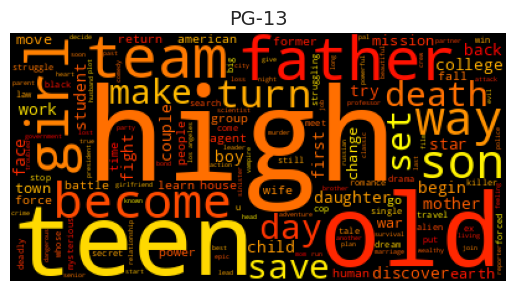

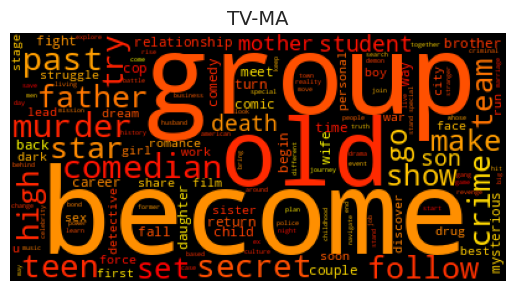

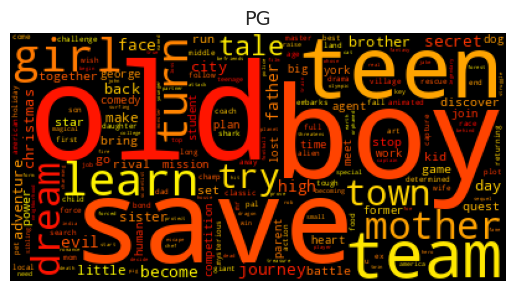

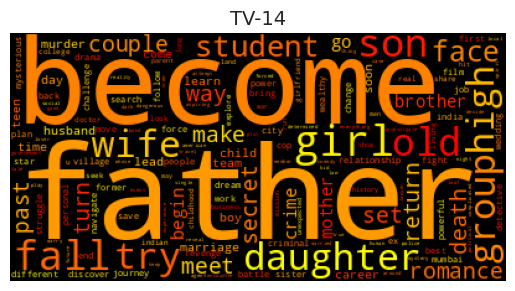

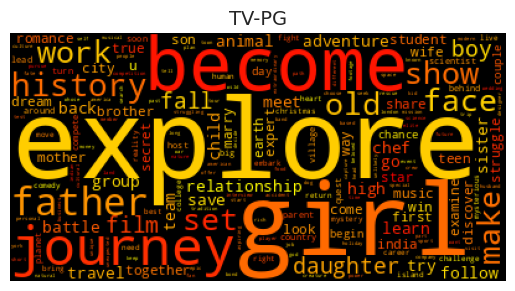

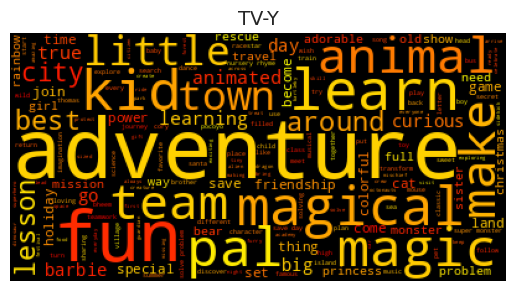

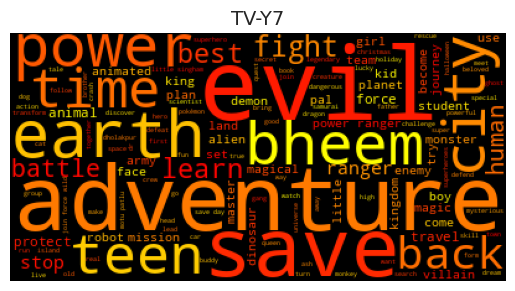

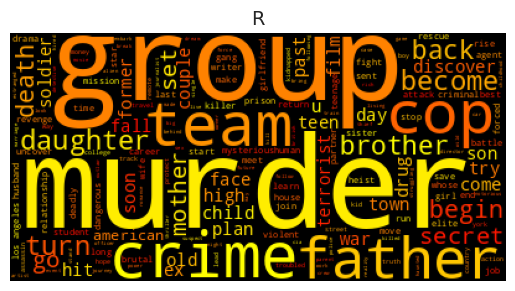

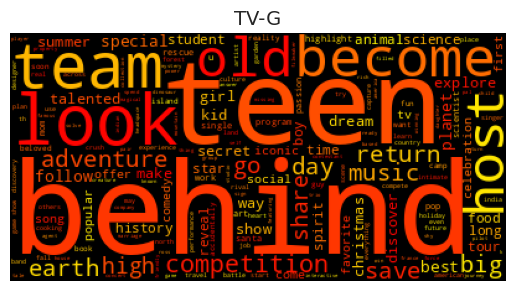

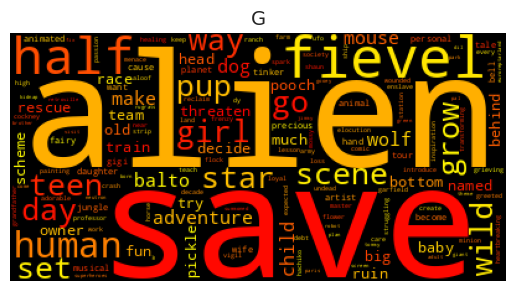

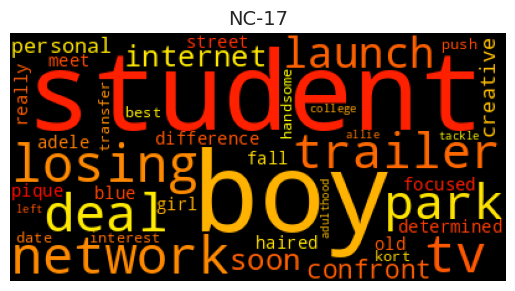

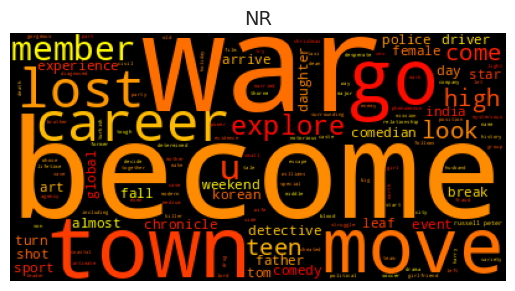

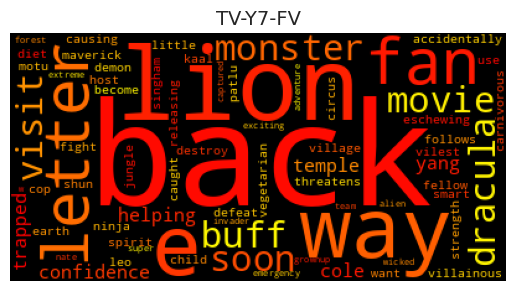

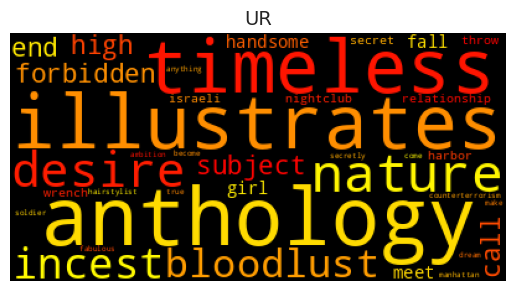

In [ ]:
for v in rating_unique_values :
  word_cloud =  WordCloud(colormap = 'autumn', stopwords=domain_stop_words).generate(' '.join(main_data[main_data.rating == v]['desc_cleaned']))
  plt.imshow(word_cloud)
  plt.title(v, size = 14)
  plt.axis('off')
  plt.show()

## Identifying similar content by Topic Modeling technique

In [ ]:
nlp_data = main_data[['description', 'desc_cleaned', 'rating']].copy()

In [ ]:
nlp_data.head()

description  \
0  As her father nears the end of his life, filmm...   
1  After crossing paths at a party, a Cape Town t...   
2  To protect his family from a powerful drug lor...   
3  Feuds, flirtations and toilet talk go down amo...   
4  In a city of coaching centers known to train I...   

                                        desc_cleaned rating  
0  father nears end life filmmaker kirsten johnso...  PG-13  
1  crossing path party cape town teen set prove w...  TV-MA  
2  protect family powerful drug lord skilled thie...  TV-MA  
3  feud flirtation toilet talk go among incarcera...  TV-MA  
4  city coaching center known train india finest ...  TV-MA

In [ ]:
bert_topic_model = BERTopic()
topics, probs = bert_topic_model.fit_transform(nlp_data['description'])

In [ ]:
bert_topic_model.get_topic_freq()

Topic  Count
0      -1   4578
24      0    427
7       1    154
22      2    144
11      3    137
..    ...    ...
87     98     11
60     99     11
13    100     11
38    101     11
72    102     11

[104 rows x 2 columns]

In [ ]:
bert_topic_model.get_topic_info().head()

Topic  Count                               Name  \
0     -1   4578                   -1_to_the_of_and   
1      0    427  0_standup_comedian_comedy_special   
2      1    154     1_detective_murder_killer_case   
3      2    144         2_film_actor_this_director   
4      3    137               3_dog_cat_animal_fun   

                                      Representation  \
0   [to, the, of, and, in, her, his, with, when, an]   
1  [standup, comedian, comedy, special, comic, st...   
2  [detective, murder, killer, case, serial, poli...   
3  [film, actor, this, director, documentary, fil...   
4  [dog, cat, animal, fun, adventures, friends, a...   

                                 Representative_Docs  
0  [A young journalist is forced into a life of c...  
1  [Chris Rock takes the stage in Brooklyn for a ...  
2  [A homicide detective, a criminal profiler and...  
3  [From controversial cartoonist to powerful Mum...  
4  [In his tiny meadow village, curious little mo...

In [ ]:
bert_topic_model.get_topic_info().iloc[1, 4]

['Chris Rock takes the stage in Brooklyn for a comedy special filled with searing observations on fatherhood, infidelity and American politics.',
 'Members of the comedy group Na Stojáka take the stage and the mic by storm for a special night of stand-up comedy.',
 'Stand-up comedy star Kevin Hart delivers his unique perspective on work, race, family and friends with this laugh-riot comedy show.']

In [ ]:
embeddings = bert_topic_model._extract_embeddings(nlp_data.reset_index()['description'], method="document")
umap_model = UMAP(n_neighbors=10, n_components=2, min_dist = 0.0, metric = 'cosine').fit(embeddings)
umap_data = pd.DataFrame(umap_model.embedding_, columns = ['x', 'y'])

In [ ]:
umap_data['topic'] = bert_topic_model.topics_

In [ ]:
nlp_data['topic'] = bert_topic_model.topics_

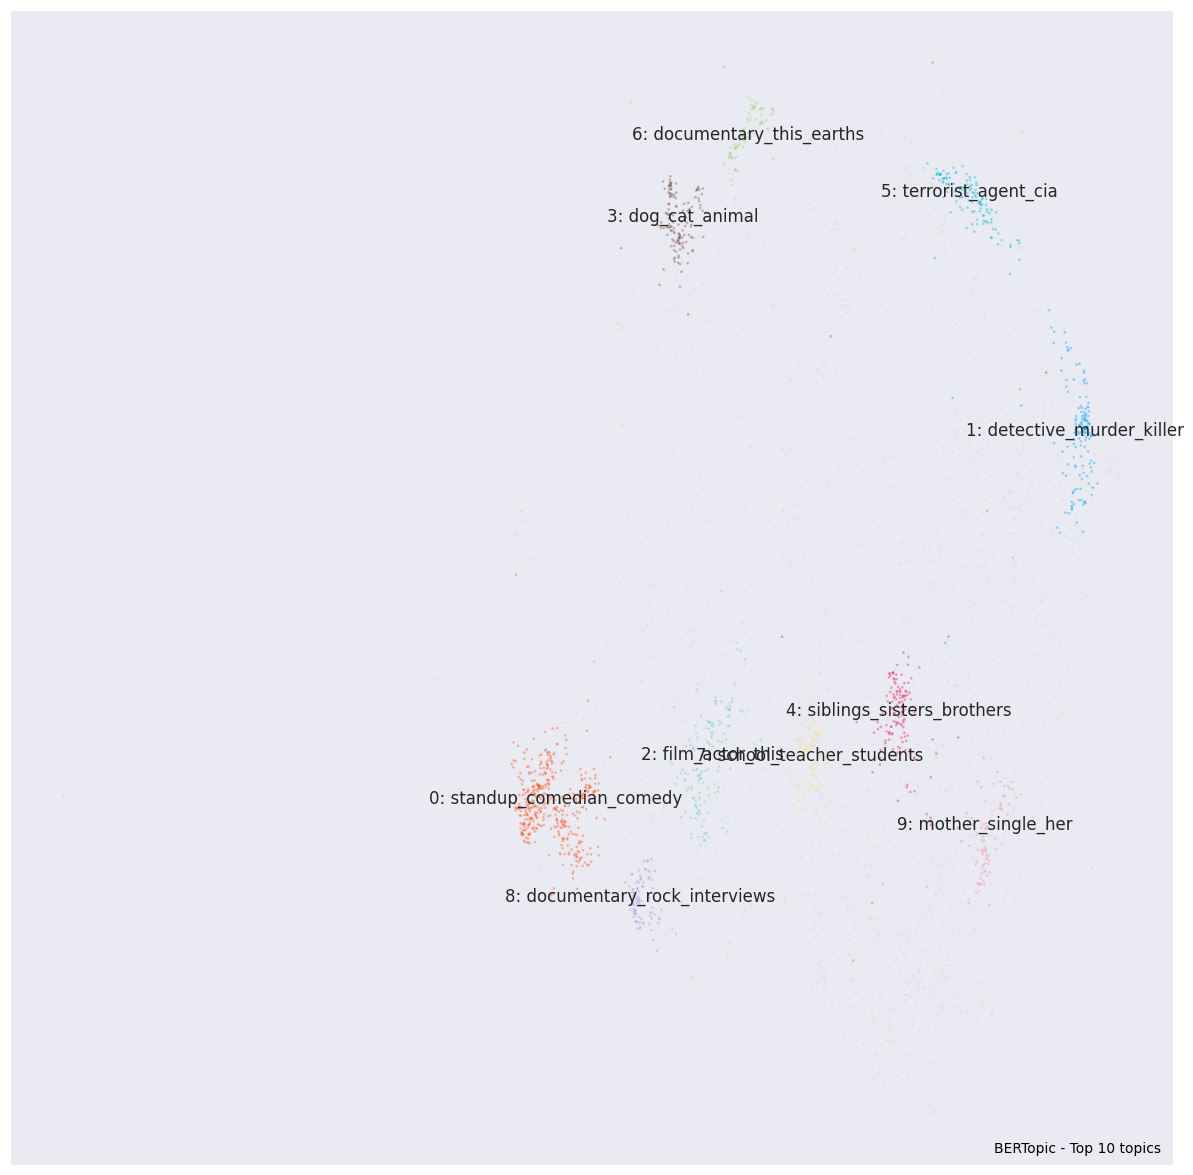

In [ ]:
# Plot parameters
top_n = 10
fontsize = 12

# Slice data
to_plot = umap_data.copy()
to_plot[umap_data.topic >= top_n] = -1
outliers = to_plot.loc[to_plot.topic == -1]
non_outliers = to_plot.loc[to_plot.topic != -1]

# Visualize topics
cmap = matplotlib.colors.ListedColormap(['#FF5722', # Red
                                        '#03A9F4', # Blue
                                        '#4CAF50', # Green
                                        '#80CBC4', # FFEB3B
                                        '#673AB7', # Purple
                                        '#795548', # Brown
                                        '#E91E63', # Pink
                                        '#212121', # Black
                                        '#00BCD4', # Light Blue
                                        '#CDDC39', # Yellow/Red
                                        '#AED581', # Light Green
                                        '#FFE082', # Light Orange
                                        '#BCAAA4', # Light Brown
                                        '#B39DDB', # Light Purple
                                        '#F48FB1', # Light Pink
                                        ])

# Visualize outliers + inliers
fig, ax = plt.subplots(figsize=(15, 15))
scatter_outliers = ax.scatter(outliers['x'], outliers['y'], c="#E0E0E0", s=1, alpha=.3)
scatter = ax.scatter(non_outliers['x'], non_outliers['y'], c=non_outliers['topic'], s=1, alpha=.3, cmap=cmap)

# Add topic names to clusters
centroids = to_plot.groupby("topic").mean().reset_index().iloc[1:]
for row in centroids.iterrows():
   topic = int(row[1].topic)
   text = f"{topic}: " + "_".join([x[0] for x in bert_topic_model.get_topic(topic)[:3]])
   ax.text(row[1].x, row[1].y*1.01, text, fontsize=fontsize, horizontalalignment='center')

ax.text(0.99, 0.01, f"BERTopic - Top {top_n} topics", transform=ax.transAxes, horizontalalignment="right", color="black")
plt.xticks([], [])
plt.yticks([], [])
plt.savefig("BERTopic_Cluster_Plot.png")
plt.show()

## Genres of the directors :

In [ ]:
','.join(main_data[main_data.director == 'Jay Karas'].listed_in)

'Children & Family Movies, Comedies, Sports Movies,Stand-Up Comedy,Stand-Up Comedy,Stand-Up Comedy,Stand-Up Comedy,Stand-Up Comedy,Stand-Up Comedy,Stand-Up Comedy,Stand-Up Comedy,Stand-Up Comedy,Stand-Up Comedy,Stand-Up Comedy,Stand-Up Comedy,Stand-Up Comedy'

In [ ]:
show_director_genres = lambda director_name : pd.Series(','.join(main_data[main_data.director == director_name].listed_in).split(',')).value_counts().plot.pie(cmap = 'autumn', autopct = '%1.1f%%')

In [ ]:
main_data.director.value_counts()[:4]

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Name: director, dtype: int64

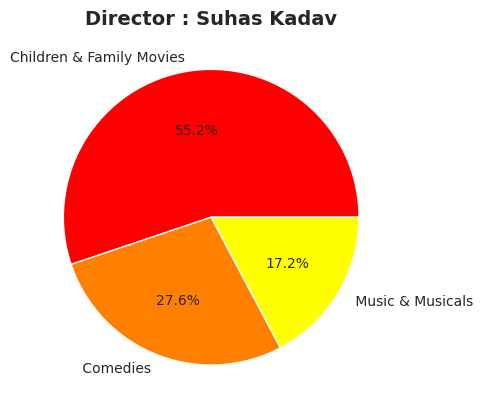

In [ ]:
ax = show_director_genres('Suhas Kadav')
set_freq(ax)
plt.title('Director : Suhas Kadav', fontweight = 'bold', size = 14)
plt.show()

## The number of films in which the actors have acted by the release year feature

In [ ]:
main_data.tail()

show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R     88 min   
8805   January 11, 2020          2006     PG     88 min   
8806      March 2, 2019          2015  TV-14    111 min   

                                           listed_in  \
8802                  Cult Movies, Dramas, Thrillers   
8803          Kids' TV, Korean TV Shows, TV Comedies   
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  \
8802  A political cartoonist, a crime reporter and a...   
8803  While living alone in a spooky town, a young g...   
8804  Looking to survive in a world taken over by zo...   
8805  Dragged from civilian life, a former superhero...   
8806  A scrappy but poor boy worms his way into a ty...   

                                           desc_cleaned  
8802  political cartoonist crime reporter pair cop i...  
8803  living alone spooky town young girl befriends ...  
8804  looking survive world taken zombie dorky colle...  
8805  dragged civilian life former superhero must tr...  
8806  scrappy poor boy worm way tycoon dysfunctional...

In [ ]:
cast_data = main_data.dropna(subset = 'cast').copy()

In [ ]:
def actor_movie_count (actor_name):

  df = cast_data[(cast_data.cast.str.contains(actor_name))]
  ax = df.release_year.value_counts().sort_index().plot.bar(label = f"Total movies : {df.shape[0]}", cmap = 'Spectral')
  set_freq(ax)
  plt.title(f"Actor : {actor_name}", size = 14, fontweight = 'bold', y = 1.05)
  plt.legend()
  plt.ylabel('Frequency', size = 12)
  plt.xlabel('Release Year', size = 12)
  plt.show()

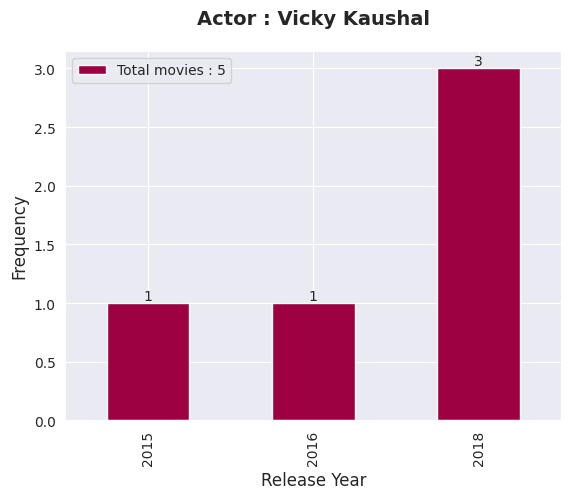

In [ ]:
actor_movie_count('Vicky Kaushal')

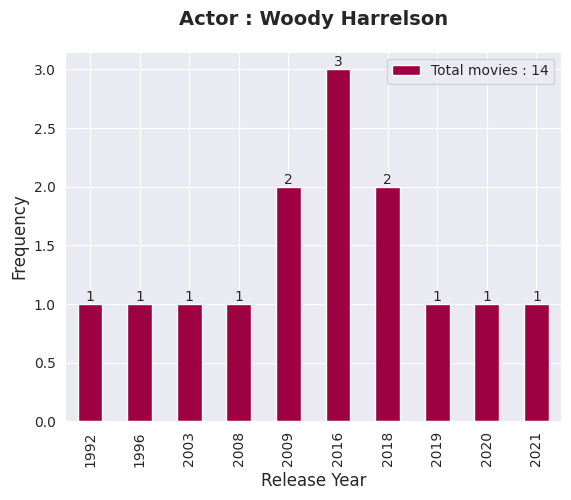

In [ ]:
actor_movie_count('Woody Harrelson')

## Does Netflix has more focus on TV Shows than movies in recent years

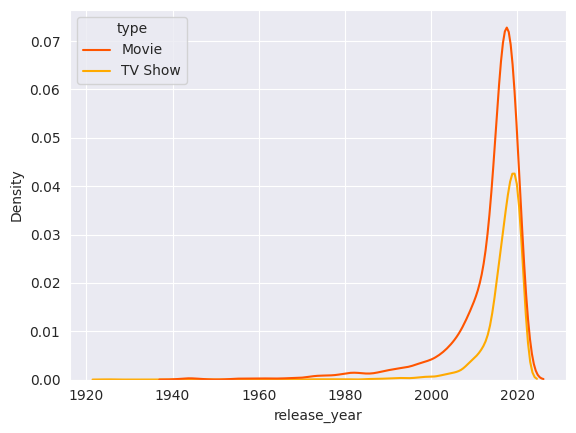

In [ ]:
sns.kdeplot(x = 'release_year', hue = 'type', data = main_data, palette='autumn')
plt.show()

the answer for this task is ( No )

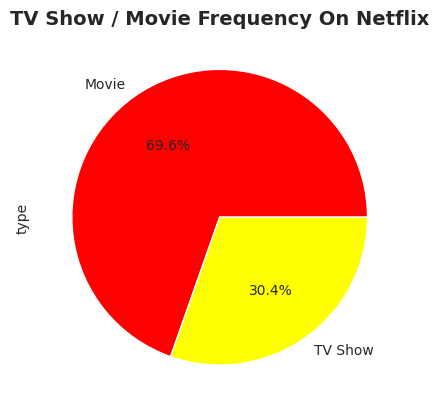

In [ ]:
main_data.type.value_counts().plot.pie(cmap = 'autumn', autopct = '%1.1f%%')
plt.title('TV Show / Movie Frequency On Netflix', size = 14, fontweight = 'bold')
plt.show()

## Genre frequency by the rating feature

In [ ]:
show_rating_genres = lambda rate : pd.Series(','.join(main_data[main_data.rating == rate].listed_in).split(',')).value_counts()[:5].plot.pie(autopct = '%1.1f%%', cmap = 'autumn')

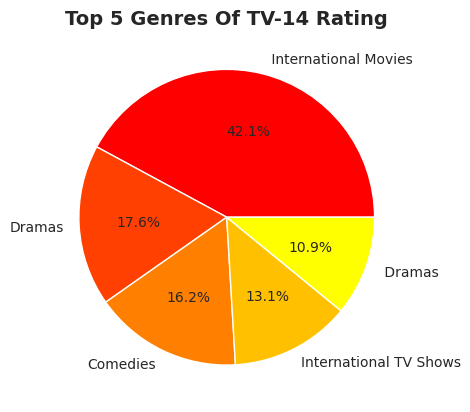

In [ ]:
ax = show_rating_genres('TV-14')
set_freq(ax)
plt.title('Top 5 Genres Of TV-14 Rating', size = 14, fontweight = 'bold')
plt.show()

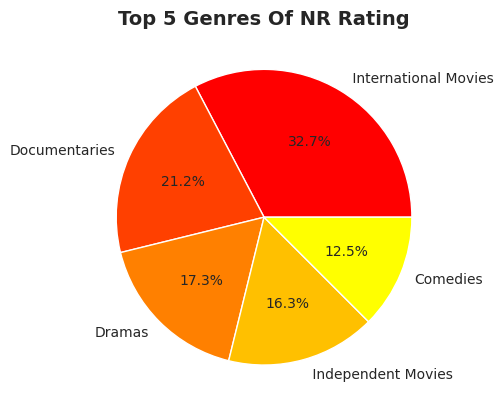

In [ ]:
ax = show_rating_genres('NR')
set_freq(ax)
plt.title('Top 5 Genres Of NR Rating', size = 14, fontweight = 'bold')
plt.show()